# Analyse simulations 2D avant amenagements (30min)


In [235]:
filepath = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/data_processing_2d/'

exec(open(filepath+'fonction2d.py').read())


"""local imports:"""
from PFlibs import io_pfb
from PFlibs import drv_vegm_io as vegio



In [236]:
root_dir = "/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/SA_2D/"
#wdir = root_dir+'SA_2D_simus/sim_2/'
#wdir = root_dir+'simus_jach_2D_006/'

#wdir = '/home/tabsobam/Documents/FD_IA/Parflow_nn/SA_2D/outputs/sim_1/'
#wdir = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/SA_2D/simus_2D_wank/simus_jach_2D_00075_wank/'
#wdir = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/SA_2D/simus_2D_tondi/sim_tondi_30min_n1_2/sim_1/'
wdir = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/SA_2D/simus_2D_bnz/sim_1/sim_1/'


#wdir = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/SA_2D/SA_2D_simus_wank/sim_1/sim_1/'
outputdir_mil = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/outs'
path_mil = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/mil_1d_cecile/'
obsdir = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/NAD_dataset/'
evaldir_mil = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/Eval_2005_2012/Eval_2005_2012/'

In [237]:
## forcçages

## Mil
forc_mil = pd.read_csv(path_mil + "forc_2006_2009.txt", delim_whitespace=True, header = None,\
names = ['Swin','Lwin','Precip','Ta','U','V','Patm','q'], index_col = None)
forc_mil.index = pd.date_range("2006-01-01 00:00:00", periods=forc_mil.shape[0],freq='30min')

## Observation mil

obs_en_mil = pd.read_csv(evaldir_mil + "en_mil_obs_06_11.txt", delim_whitespace=True,\
 index_col = None,na_values= ['-9999.000','-6999.00000'])
obs_en_mil.index = pd.date_range("2006-01-01 00:00:00", periods=obs_en_mil.shape[0],freq='30min')
obs_en_mil['ET'] = 1800*obs_en_mil['LE']/2.5104e06
obs_en_mil['Rn_obs'] = forc_mil.Lwin - obs_en_mil.LWout + forc_mil.Swin - obs_en_mil.SWout
obs_en_mil['Rn_obs_in'] = forc_mil.Lwin  + forc_mil.Swin  
obs_en_mil['Rn_obs_out'] = obs_en_mil.LWout + obs_en_mil.SWout

#obs_en_mil.alb.replace(np.NaN, 0, inplace=True)
obs_en_mil['G']=np.mean([obs_en_mil.G1,obs_en_mil.G2,obs_en_mil.G3],axis=0)

obs_en_mil['H_LE'] = obs_en_mil['H'] + obs_en_mil['LE']
obs_en_mil['Rn_G'] = obs_en_mil['Rn_obs'] - obs_en_mil['G1']

obs_en_mil=obs_en_mil.loc['2006':'2009']

    
lai_mil_j = pd.read_csv(path_mil+'pheno_mil_cecile_2005_2012_j.txt', delim_whitespace=True,header=None,\
                   index_col = None)
lai_mil_j =lai_mil_j.set_index(pd.date_range("2005-01-01",periods=lai_mil_j.shape[0],freq="D"))

lai_mil_j=lai_mil_j.loc['2006':'2009']

#forc_bnz =  pd.read_csv('/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/SA_2D/forc_bnz_06_09.txt', delim_whitespace=True, header = None,\
#names = ['Swin','Lwin','Precip','Ta','U','V','Patm','q'], index_col = None)
#forc_bnz.index = pd.date_range("2006-01-01 00:00:00", periods=forc_bnz.shape[0],freq='30min')


# Supposons que df_wankama, df_tondi, et df_bani sont vos DataFrames


evts_pluvieux_bnz_90_21 = pd.read_csv('/home/tabsobam//Documents/parflow_pratice/PARFLOW_IGE/modele_2d/data/rainfall_AMMA-CATCH_2023_07_12/evts_banizoumbou_6h_90_21.txt', delimiter='\t',\
index_col = None)
evts_pluvieux_bnz_90_21.index = evts_pluvieux_bnz_90_21.Starting
evts_pluvieux_bnz_90_21.index = pd.to_datetime(evts_pluvieux_bnz_90_21.index)

df_bani =  evts_pluvieux_bnz_90_21.loc['2006':'2009']
stat_bani = df_bani.describe()

'''
evts_pluvieux_tondi_90_21 = pd.read_csv('/home/tabsobam//Documents/parflow_pratice/PARFLOW_IGE/modele_2d/data/rainfall_AMMA-CATCH_2023_07_12/evts_pluie_tondi_6h_06_09.txt', delimiter='\t',\
 index_col = None)
evts_pluvieux_tondi_90_21.index = evts_pluvieux_tondi_90_21.Starting
evts_pluvieux_tondi_90_21.index = pd.to_datetime(evts_pluvieux_tondi_90_21.index)

evts_pluvieux_wank_90_21 = pd.read_csv('/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/jachere_1d_cecile/evts_wank_jach_6h_06_11.txt', delimiter='\t',\
 index_col = None)
evts_pluvieux_wank_90_21.index = evts_pluvieux_wank_90_21.Starting
evts_pluvieux_wank_90_21.index = pd.to_datetime(evts_pluvieux_wank_90_21.index)



df_wankama = evts_pluvieux_wank_90_21.loc['2006':'2009']
df_tondi = evts_pluvieux_tondi_90_21.loc['2006':'2009']

stat_wankama = df_wankama.describe()
stat_tondi = df_tondi.describe()

'''



"\nevts_pluvieux_tondi_90_21 = pd.read_csv('/home/tabsobam//Documents/parflow_pratice/PARFLOW_IGE/modele_2d/data/rainfall_AMMA-CATCH_2023_07_12/evts_pluie_tondi_6h_06_09.txt', delimiter='\t', index_col = None)\nevts_pluvieux_tondi_90_21.index = evts_pluvieux_tondi_90_21.Starting\nevts_pluvieux_tondi_90_21.index = pd.to_datetime(evts_pluvieux_tondi_90_21.index)\n\nevts_pluvieux_wank_90_21 = pd.read_csv('/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/jachere_1d_cecile/evts_wank_jach_6h_06_11.txt', delimiter='\t', index_col = None)\nevts_pluvieux_wank_90_21.index = evts_pluvieux_wank_90_21.Starting\nevts_pluvieux_wank_90_21.index = pd.to_datetime(evts_pluvieux_wank_90_21.index)\n\n\n\ndf_wankama = evts_pluvieux_wank_90_21.loc['2006':'2009']\ndf_tondi = evts_pluvieux_tondi_90_21.loc['2006':'2009']\n\nstat_wankama = df_wankama.describe()\nstat_tondi = df_tondi.describe()\n\n"

### Verification Forçages

In [238]:
## Forçages copiés dans le dossier de simu

dos = '/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/forc_dir/'

forc_bnz_30min =  pd.read_csv(dos+"forc_bnz_30min_2006_2009_V1.txt",names = ['Swin','Lwin','Precip','Ta','U','V','Patm','q'],\
                          delim_whitespace=True, header = None, index_col = None)
forc_bnz_30min .index = pd.date_range("2006-01-01 00:00:00", periods=forc_bnz_30min.shape[0],freq='30min')

## Forçages utilisés dans la simu

forc =  pd.read_csv(wdir+'forcagePF.txt.0', delim_whitespace=True, header = None,\
names = ['Swin','Lwin','Precip','Ta','U','V','Patm','q'], index_col = None)
#forc_bnz.index = pd.date_range("2006-01-01 00:00:00", periods=forc_bnz.shape[0],freq='30min')
forc.index = pd.date_range("2006-01-01 00:00:00", periods=forc.shape[0],freq='30min')



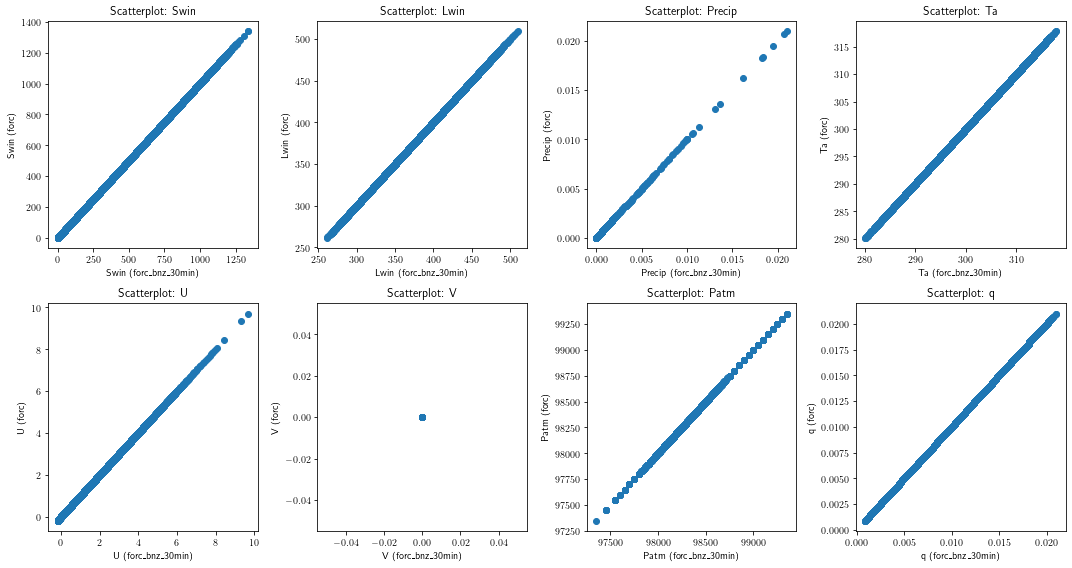

In [239]:
import pandas as pd
import matplotlib.pyplot as plt

# Créer une liste de noms de colonnes communs
colonnes_communes = forc_bnz_30min.columns.intersection(forc.columns)

# Déterminer le nombre de colonnes et de lignes pour la disposition des sous-graphiques
nb_colonnes = len(colonnes_communes) // 2
nb_lignes = 2  # Pour aligner les graphiques sur deux lignes

# Créer une figure et des axes pour les sous-graphiques
fig, axes = plt.subplots(nb_lignes, nb_colonnes, figsize=(15, 8))

# Parcourir chaque paire de colonnes communes et tracer le scatterplot correspondant
for i, colonne in enumerate(colonnes_communes):
    ligne = i // nb_colonnes  # Calcule la ligne pour le sous-graphique
    colonne_index = i % nb_colonnes  # Calcule l'index de la colonne pour le sous-graphique
    
    # Tracer le scatterplot pour la paire de colonnes correspondantes
    axes[ligne, colonne_index].scatter(forc_bnz_30min[colonne], forc[colonne])
    axes[ligne, colonne_index].set_xlabel(f'{colonne} (forc_bnz_30min)')
    axes[ligne, colonne_index].set_ylabel(f'{colonne} (forc)')
    axes[ligne, colonne_index].set_title(f'Scatterplot: {colonne}')

# Ajuster automatiquement les paramètres de la figure pour un meilleur ajustement
plt.tight_layout()

# Afficher le graphique
plt.show()


<AxesSubplot:>

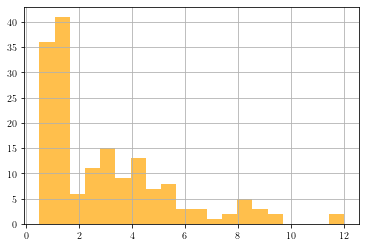

In [240]:
pluie_bnz_30min = forc['Precip']*30*60
pluie_bnz_30min = pluie_bnz_30min.loc['2006':'2009']

df_bani['Duration'].hist(bins=20, color='orange', alpha=0.7)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


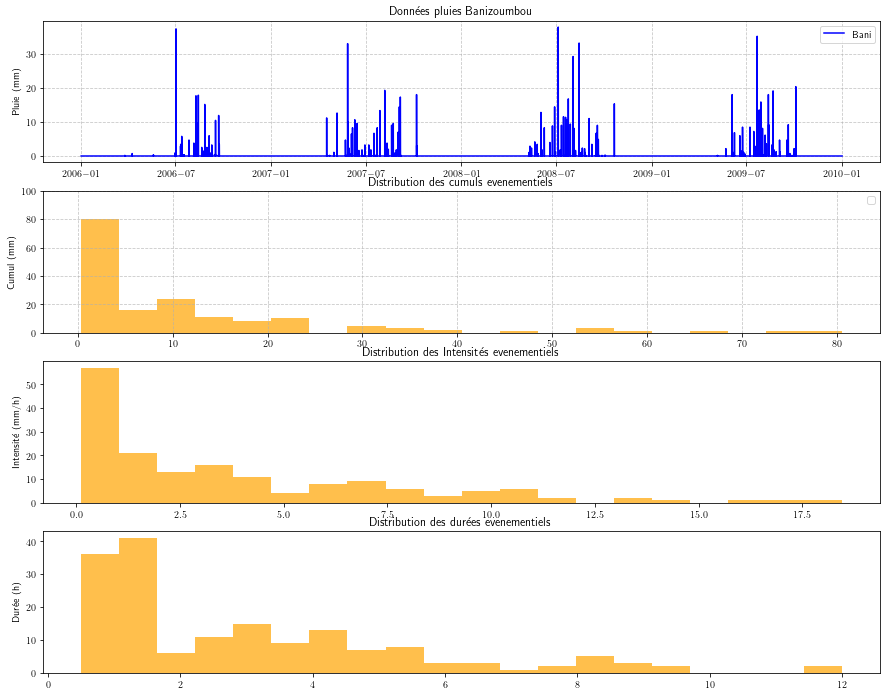

In [241]:
import matplotlib.pyplot as plt
import numpy as np

# Créer la figure et les sous-graphiques
fig, axs = plt.subplots(4, 1, figsize=(15, 12))

# Tracer les données sur chaque sous-graphique

axs[0].plot(pluie_bnz_30min.index, pluie_bnz_30min, label='Bani', color='blue')
#axs[1].hist(pluie_bnz_30min[pluie_bnz_30min != 0], bins=10, color='green', alpha=0.7)
#axs[1].set_title('Distribution des cumuls - Bani')
axs[0].set_ylabel("Pluie (mm)")


axs[1].hist(df_bani['Volume'], bins=20, color='orange', alpha=0.7)
axs[1].set_title('Distribution des cumuls evenementiels')
axs[1].set_ylabel("Cumul (mm)")


axs[1].set_ylim([0, 100])  # Réglez les limites spécifiques pour cet axe y

# Tracer la distribution des intensités sur le troisième sous-graphique
axs[2].hist(df_bani['Intensity'], bins=20, color='orange', alpha=0.7)
axs[2].set_title('Distribution des Intensités evenementiels')
axs[2].set_ylabel("Intensité (mm/h)")



axs[3].hist(df_bani['Duration'], bins=20, color='orange', alpha=0.7)
axs[3].set_title('Distribution des durées evenementiels')
axs[3].set_ylabel("Durée (h)")




#axs[2].set_title('Distribution de la pluie - Bani')

# Ajouter des légendes
axs[0].legend()
axs[1].legend()
#axs[2].legend()

# Ajouter une grille
axs[0].grid(True, linestyle='--', alpha=0.7)
axs[1].grid(True, linestyle='--', alpha=0.7)
#axs[2].grid(True, linestyle='--', alpha=0.7)

# Définir l'échelle commune pour les axes y


# Ajouter un titre global
axs[0].set_title('Données pluies Banizoumbou')

# Afficher le graphique
plt.show()


In [243]:
### Ks utilisés sur la croute

wdir1 = os.path.dirname(os.path.dirname(wdir)) + '/' 
#pfb_ks = io_pfb.PFB_read('/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/SA_2D/perm_32_def.pfb',1)
pfb_ks = io_pfb.PFB_read(wdir1+'perm1.pfb',1)

#hdr = pfb_ks[1]
pfb_ks = pfb_ks[0]

#veg = parameters['VEG'][0]
#tal = parameters['TAL'][0]

#sn = pfb_ks[0,31:32, :1][0, 0]
#veg = pfb_ks[0,21:26, :1][0, 0]
#tal = pfb_ks[0,:1, :1][0, 0]

pfb_ks[0,:,:1].T

array([[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.002,
        0.002, 0.002, 0.002, 0.002, 0.02 , 0.02 , 0.02 , 0.002, 0.002,
        0.002, 0.002, 0.002, 0.02 , 0.02 , 0.02 , 0.02 , 0.02 , 0.002,
        0.002, 0.002, 0.002, 0.002, 0.002]])

### Profil topo

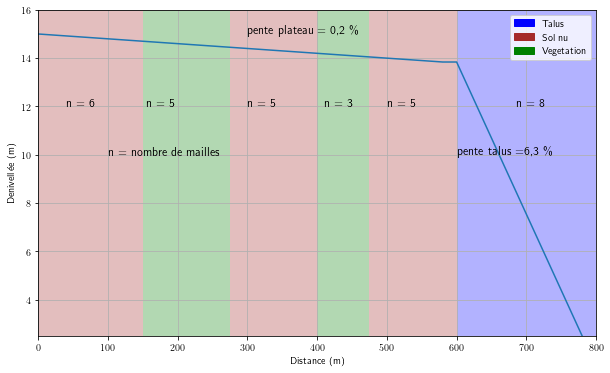

In [246]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# Générer des valeurs de distance de 0 à 800 avec un pas de 20
distance = np.arange(0, 801, 20)

# Définir la droite d'équation y = 0,002x + 15

# Définir la pente pour la portion 0 à 600
#pente1 = -0.006
pente1 =  -0.002
altitude1 = pente1 * distance[:30] + 15  # 30 car 600/20 = 30

# Définir la pente pour la portion 600 à 800
#pente2 = -0.05
pente2 = -0.063
altitude2 = altitude1[-1] + pente2 * (distance[30:] - distance[30]) 

#profil = np.array(np.concatenate([np.repeat(0.063, 8), np.repeat(0.002, 24)]))


altitude = np.concatenate([altitude1, altitude2])

portions = [(0, 150, 'brown'),(150, 275, 'green'),(275, 400, 'brown'),(400, 475, 'green'),(475, 600, 'brown'),(600, 800, 'blue')]
#portions = [(0, 150, 'brown'),(150, 275, 'brown'),(275, 400, 'brown'),(400, 475, 'green'),(475, 600, 'brown'),(600, 800, 'brown')]
#portions = [(0, 150, 'brown'),(150, 275, 'brown'),(275, 400, 'brown'),(400, 475, 'brown'),(475, 600, 'brown'),(600, 800, 'brown')]


legend_patches = []

# Tracer la droite d'équation


# Tracé du profil topographique
plt.figure(figsize=(10, 6))
plt.plot(distance, altitude )

# Ajouter des couleurs pour chaque portion définie
for start, end, color in portions:
    plt.axvspan(start, end, facecolor=color, alpha=0.3)

        # Créer un objet Patch pour la légende
    legend_patch = mpatches.Patch(color=color, label=f'{start}-{end}')
    legend_patches.append(legend_patch)

colors = ['blue','brown','green' ]
#lines = [Line2D([0], [0], color=c) for c in colors]
lines = [mpatches.Patch(color=c)for c in colors]
labels = ['Talus', 'Sol nu','Vegetation']
plt.legend(lines, labels)

plt.text(40, 12, f'n = 6', fontsize=12)
plt.text(155, 12, f'n = 5', fontsize=12)
plt.text(300, 12, f'n = 5', fontsize=12)
plt.text(410, 12, f'n = 3', fontsize=12)
plt.text(500, 12, f'n = 5', fontsize=12)
#plt.text(550, 12, f'n = 2', fontsize=12)
plt.text(685, 12, f'n = 8', fontsize=12)
plt.text(100, 10, f'n = nombre de mailles', fontsize=12)
plt.text(300, 15, f'pente plateau = 0,2 \%', fontsize=12)
plt.text(600, 10, f'pente talus =6,3 \% ', fontsize=12)



plt.xlabel("Distance (m)")
plt.ylabel("Denivellée (m)")
plt.xlim(0, 800)
plt.ylim(2.5, 16)  # Ajuster la limite en altitude pour une meilleure visualisation
#plt.legend()
plt.grid(True)
plt.show()


### Relation pluie-débit

In [247]:
ds1 = read_and_process_pf_outputs(wdir)
with ParflowBinaryReader(glob.glob(wdir+'*.press.00000.pfb')[0]) as s: h = s.header

var_dz = read_pfb(glob.glob(wdir+'*mult*.pfb')[0])
dc1 = read_clm_outputs(wdir,freq ='30min')
dc1 = dc1.assign(slopex=(("y"),read_pfb(glob.glob(wdir+'*slope_x*.pfb')[0])[0,:,0]))
dc1 = dc1.assign(slopey=(("y"),read_pfb(glob.glob(wdir+'*slope_y*.pfb')[0])[0,:,0]))
dc1 = dc1.assign(mask=(("z","y","x"),read_pfb(glob.glob(wdir+'*mask*.pfb')[0])))
#hill = Run.from_definition(root_dir+'jach_c_2d.pfidb')
hill = Run.from_definition(root_dir+'jach_c_2d.pfidb')
manning = hill.Mannings.Geom.domain.Value




{'x': 0.0, 'y': 0.0, 'z': 0.0, 'nx': 1, 'ny': 32, 'nz': 30, 'dx': 100.0, 'dy': 25.0, 'dz': 1.0, 'n_subgrids': 4, 'p': 1, 'q': 4, 'r': 1}
{'x': 0.0, 'y': 0.0, 'z': 0.0, 'nx': 1, 'ny': 32, 'nz': 30, 'dx': 100.0, 'dy': 25.0, 'dz': 1.0, 'n_subgrids': 4, 'p': 1, 'q': 4, 'r': 1}
(70128, 38, 32, 1)
 => Error during CLM import - CLM specific key have been skipped


In [254]:

dc2 = read_clm_outputs(wdir,freq ='30min')
dc2 = dc2.assign(slopex=(("y"),read_pfb(glob.glob(wdir+'*slope_x*.pfb')[0])[0,:,0]))
dc2 = dc2.assign(slopey=(("y"),read_pfb(glob.glob(wdir+'*slope_y*.pfb')[0])[0,:,0]))
dc2 = dc2.assign(mask=(("z","y","x"),read_pfb(glob.glob(wdir+'*mask*.pfb')[0])))

hill = Run.from_definition(root_dir+'jach_c_2d.pfidb')
manning = hill.Mannings.Geom.domain.Value
dc2 = dc2.assign(Q=lambda x: ('time',calculate_runoff_from_press(x.htop.data[:,0],
                                                         x.slopex.data[0],
                                                         x.slopey.data[0],
                                                         100,25,manning)))
dc2.Q.attrs['units']='m3/h'


df1 = pd.DataFrame()
df1['runoff'] = dc2.Q*1000/h['dx']/h['dy']/h['ny']/2
#df.index = pd.date_range("2006-01-01 00:00:00", periods=forc_bnz.shape[0],freq='30min')
df1.index = pd.date_range("2006-01-01 00:00:00", periods=df1.shape[0],freq='30min')

df1 = df1.loc['2006':'2008']


{'x': 0.0, 'y': 0.0, 'z': 0.0, 'nx': 1, 'ny': 32, 'nz': 30, 'dx': 100.0, 'dy': 25.0, 'dz': 1.0, 'n_subgrids': 4, 'p': 1, 'q': 4, 'r': 1}
(70128, 38, 32, 1)
 => Error during CLM import - CLM specific key have been skipped


<string>:38: RuntimeWarning: invalid value encountered in power


##### Echantillonnage Runoff

In [258]:
data_amenag =  pd.read_csv("/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/data/Pluie-Le_après-Aménagement.csv", delimiter=",")
data_amenag['Dates'] = pd.to_datetime(data_amenag['Dates'], format='%d/%m/%Y')
data_amenag['Pluie (mm)'] = data_amenag['Pluie (mm)'].str.replace(',', '.').astype(float)
data_amenag['LR_avant'] = data_amenag['LR_avant'].str.replace(',', '.').astype(float)
data_amenag['LR_après'] = data_amenag['LR_après'].str.replace(',', '.').astype(float)

data_amenag = data_amenag.set_index(data_amenag['Dates'])

data_amenag = data_amenag.loc['2006':'2008']

/tmp/ipykernel_252421/285847935.py:9: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  data_amenag = data_amenag.loc['2006':'2008']


In [261]:
df = pd.DataFrame()
df['runoff'] = dc1.Q[:,0]
#df.index = pd.date_range("2006-01-01 00:00:00", periods=forc_bnz.shape[0],freq='30min')
df.index = pd.date_range("2006-01-01 00:00:00", periods=df.shape[0],freq='30min')

df = df.loc['2006':'2008']

#df = df.resample('30T').sum()


In [264]:
### Chargement des evts pluvieux calculés dans R
## Le temps inter evenements est de 6h





#pluie_tkn_30min = pd.read_csv('/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/data/rainfall_AMMA-CATCH_2023_07_12/pluie_tondi_30min_2006_2009.txt',\
#                              delim_whitespace=True , header=None,names = ['Pluie'])

#pluie_tkn_30min.index = pd.date_range("2006-01-01 00:00:00", periods=pluie_tkn_30min.shape[0],freq='30min')

#pluie_wank_30min = pd.read_csv('/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/mil_1d_cecile/pluie_wank_mil_30min_06_11.txt',\
#                              delim_whitespace=True , header=None,names = ['Pluie'])

#pluie_wank_30min.index = pd.date_range("2006-01-01 00:00:00", periods=pluie_wank_30min.shape[0],freq='30min')


#pluie_wank_30min = pluie_wank_30min.loc['2006':'2009']

#pluie_bnz_30min = pd.read_csv('/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/data/rainfall_AMMA-CATCH_2023_07_12/pluie_banizoumbou_90_21_30min.txt',\
#                              delim_whitespace=True , header=None,names = ['Pluie'])

#pluie_bnz_30min.index = pd.date_range("2006-01-01 00:00:00", periods=pluie_bnz_30min.shape[0],freq='30min')



evts_pluvieux_bnz_90_21 = pd.read_csv('/home/tabsobam//Documents/parflow_pratice/PARFLOW_IGE/modele_2d/data/rainfall_AMMA-CATCH_2023_07_12/evts_banizoumbou_6h_90_21.txt', delimiter='\t',\
 index_col = None)

#evts_pluvieux_bnz_90_21 = pd.read_csv('/home/tabsobam//Documents/parflow_pratice/PARFLOW_IGE/modele_2d/data/rainfall_AMMA-CATCH_2023_07_12/evts_pluie_tondi_6h_06_09.txt', delimiter='\t',\
# index_col = None)

#evts_pluvieux_bnz_90_21 = pd.read_csv('/home/tabsobam//Documents/parflow_pratice/PARFLOW_IGE/modele_2d/data/rainfall_AMMA-CATCH_2023_07_12/evts_pluie(30min)_tondi_6h_06_09.txt', delimiter='\t',\
# index_col = None)

#evts_pluvieux_bnz_90_21 = pd.read_csv('/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_1d/jachere_1d_cecile/evts_wank_jach_6h_06_11.txt', delimiter='\t',\
# index_col = None)

evts_pluvieux_bnz_90_21.index = evts_pluvieux_bnz_90_21.Starting
evts_pluvieux_bnz_90_21.index = pd.to_datetime(evts_pluvieux_bnz_90_21.index)

evts_bnz_06_08 = evts_pluvieux_bnz_90_21.loc['2006':'2008']
evts_bnz_06_08  = evts_bnz_06_08[evts_bnz_06_08['Volume'] > 0.5]


In [265]:
#plt.plot(df['runoff'].loc['2006'].index,df['runoff'].loc['2006'])
#plt.plot(pluie_wank_30min.Pluie.loc['2006'].index,pluie_wank_30min.Pluie.loc['2006'])

In [267]:
import matplotlib.pyplot as plt

# Supposons que df['runoff'] et pluie_tkn_30min['Pluie'] sont vos colonnes de données

pluie_bnz_30min = forc.loc['2006':'2009']

pluie_bnz_30min['Precip'] = forc.Precip*5*60

#pluie_bnz_30min['Precip'] = pluie_bnz_30min.Precip*5*60
pluie_bnz_30min = pluie_bnz_30min.loc['2006':'2008']

# Créer la figure et les sous-graphiques
fig, axs = plt.subplots(figsize=(20, 5), sharey=True)

# Boucle pour les années 2006 à 2008
# Tracer la colonne runoff sur l'axe principal
axs.plot(df1['runoff'].index, df1['runoff'], label='Runoff', color='blue')

# Créer un axe y secondaire partageant le même axe x
ax2 = axs.twinx()

# Tracer la colonne Pluie sur l'axe secondaire (inversé)
ax2.plot(pluie_bnz_30min['Precip'].index, pluie_bnz_30min['Precip'], label='Pluie', color='green')

# Inverser l'axe y de l'axe secondaire (mettre la pluie en haut)
ax2.invert_yaxis()

# Ajouter des légendes
axs.legend(loc='upper left')
ax2.legend(loc='upper right')
axs.set_ylabel('Runoff (mm)')
ax2.set_ylabel('Pluie (mm)')

# Afficher le graphique
plt.show()


In [268]:
df1

runoff
2006-01-01 00:00:00     0.0
2006-01-01 00:30:00     0.0
2006-01-01 01:00:00     0.0
2006-01-01 01:30:00     0.0
2006-01-01 02:00:00     0.0
...                     ...
2008-12-31 21:30:00     0.0
2008-12-31 22:00:00     0.0
2008-12-31 22:30:00     0.0
2008-12-31 23:00:00     0.0
2008-12-31 23:30:00     0.0

[52608 rows x 1 columns]

In [269]:
evts_bnz_06_08

Starting                  End  Duration  \
Starting                                                                  
2006-04-08 23:30:00  2006-04-08 23:30:00  2006-04-08 23:30:00       0.5   
2006-05-19 15:00:00  2006-05-19 15:00:00  2006-05-19 17:30:00       3.0   
2006-06-30 05:00:00  2006-06-30 05:00:00  2006-06-30 05:30:00       1.0   
2006-07-02 05:30:00  2006-07-02 05:30:00  2006-07-02 10:00:00       5.0   
2006-07-10 21:00:00  2006-07-10 21:00:00  2006-07-11 05:30:00       9.0   
...                                  ...                  ...       ...   
2008-09-15 21:00:00  2008-09-15 21:00:00  2008-09-16 01:30:00       5.0   
2008-09-18 03:30:00  2008-09-18 03:30:00  2008-09-18 04:30:00       1.5   
2008-09-19 23:30:00  2008-09-19 23:30:00  2008-09-20 02:00:00       3.0   
2008-10-03 00:30:00  2008-10-03 00:30:00  2008-10-03 08:30:00       8.5   
2008-10-20 17:30:00  2008-10-20 17:30:00  2008-10-20 18:00:00       1.0   

                     Volume  Intensity  
Starting                                
2006-04-08 23:30:00    0.75   1.500000  
2006-05-19 15:00:00    0.75   0.250000  
2006-06-30 05:00:00    1.02   1.020000  
2006-07-02 05:30:00   54.00  10.800000  
2006-07-10 21:00:00   14.31   1.590000  
...                     ...        ...  
2008-09-15 21:00:00   19.12   3.824000  
2008-09-18 03:30:00   10.96   7.306667  
2008-09-19 23:30:00   10.05   3.350000  
2008-10-03 00:30:00    0.97   0.114118  
2008-10-20 17:30:00   16.03  16.030000  

[103 rows x 5 columns]

In [270]:

import datetime
### La fin du runoff est la fin de la pluie + 5h30 min (Methode 1)
df_events_runoff = pd.DataFrame(columns=['Debut','Fin','runoff'],index=range(len(evts_bnz_06_08)))
#year = ['2006','2007','2008']

runoff_event = []

for j in range(len(evts_bnz_06_08)):
    #data_evts_2006 = evts_bnz_06_08.loc[i]
    fin_runoff = pd.to_datetime(evts_bnz_06_08['Starting'][j]) + datetime.timedelta(hours=(evts_bnz_06_08['Duration'][j]+5.5))
    rff = df.loc[pd.to_datetime(evts_bnz_06_08['Starting'][j]) : fin_runoff].sum()
    runoff_event = [pd.to_datetime(evts_bnz_06_08['Starting'][j]),fin_runoff,rff.runoff]

    df_events_runoff.loc[j] = runoff_event

df_events_runoff

Debut                  Fin    runoff
0    2006-04-08 23:30:00  2006-04-09 05:30:00       0.0
1    2006-05-19 15:00:00  2006-05-19 23:30:00       0.0
2    2006-06-30 05:00:00  2006-06-30 11:30:00       0.0
3    2006-07-02 05:30:00  2006-07-02 16:00:00  8.358585
4    2006-07-10 21:00:00  2006-07-11 11:30:00       0.0
..                   ...                  ...       ...
98   2008-09-15 21:00:00  2008-09-16 07:30:00       0.0
99   2008-09-18 03:30:00  2008-09-18 10:30:00       0.0
100  2008-09-19 23:30:00  2008-09-20 08:00:00       0.0
101  2008-10-03 00:30:00  2008-10-03 14:30:00       0.0
102  2008-10-20 17:30:00  2008-10-21 00:00:00       0.0

[103 rows x 3 columns]

In [271]:
'''
import datetime
### La fin du runoff est la fin de la pluie + 5h30 min (Methode 1)
df_events_runoff = pd.DataFrame(columns=['Debut','Fin','runoff'],index=range(len(evts_bnz_06_08)))
#year = ['2006','2007','2008']

runoff_event = []

for j in range(len(evts_bnz_06_08)):
    #data_evts_2006 = evts_bnz_06_08.loc[i]
    fin_runoff = pd.to_datetime(evts_bnz_06_08['Starting'][j]) + datetime.timedelta(hours=(evts_bnz_06_08['Duration'][j]+5.5))
    rff = df.loc[pd.to_datetime(evts_bnz_06_08['Starting'][j]) : fin_runoff].sum()
    runoff_event = [pd.to_datetime(evts_bnz_06_08['Starting'][j]),fin_runoff,rff.runoff]

    df_events_runoff.loc[j] = runoff_event

df_events_runoff
'''

"\nimport datetime\n### La fin du runoff est la fin de la pluie + 5h30 min (Methode 1)\ndf_events_runoff = pd.DataFrame(columns=['Debut','Fin','runoff'],index=range(len(evts_bnz_06_08)))\n#year = ['2006','2007','2008']\n\nrunoff_event = []\n\nfor j in range(len(evts_bnz_06_08)):\n    #data_evts_2006 = evts_bnz_06_08.loc[i]\n    fin_runoff = pd.to_datetime(evts_bnz_06_08['Starting'][j]) + datetime.timedelta(hours=(evts_bnz_06_08['Duration'][j]+5.5))\n    rff = df.loc[pd.to_datetime(evts_bnz_06_08['Starting'][j]) : fin_runoff].sum()\n    runoff_event = [pd.to_datetime(evts_bnz_06_08['Starting'][j]),fin_runoff,rff.runoff]\n\n    df_events_runoff.loc[j] = runoff_event\n\ndf_events_runoff\n"

In [272]:
#a, b = np.polyfit(data_amenag['Pluie (mm)'],data_amenag['LR_avant'],1)
## Pluies annuelles Aghali
from scipy.stats import pearsonr
#f11 = open('/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/SA_2D/SA_PF_TKN.tcl','r')
#contents = f11.readlines()

wdir1 = os.path.dirname(os.path.dirname(wdir)) + '/' 


sa_mil_files = glob.glob(f'{wdir1}/SA_mil*')
f11 = open(sa_mil_files[0], 'r')
contents = f11.readlines()

a_vg = contents[480][39:43]
n_vg = contents[481][39:42]

parameters = pd.read_csv('/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/SA_2D/SA_2D_simus_wank/perms.txt', delim_whitespace=True,index_col = None)

#pfb_ks = io_pfb.PFB_read('/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/SA_2D/perm_32_def.pfb',1)
pfb_ks = io_pfb.PFB_read('/home/tabsobam/Documents/parflow_pratice/PARFLOW_IGE/modele_2d/SA_2D/simus_2D_bnz/perms_pfbs/perm1.pfb',1)

#hdr = pfb_ks[1]
pfb_ks = pfb_ks[0]

sn = pfb_ks[0,31:32, :1][0, 0]
#veg = parameters['VEG'][0]
#tal = parameters['TAL'][0]

veg = pfb_ks[0,21:26, :1][0, 0]
tal = pfb_ks[0,:1, :1][0, 0]

#rh = 0.01/sn
rh = 0.00017/sn


import pandas as pd
import matplotlib.pyplot as plt


# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.scatter(data_amenag['Pluie (mm)'], data_amenag['LR_avant'], marker='o',label='Obs (Tondi)')
plt.scatter(evts_bnz_06_08['Volume'],df_events_runoff['runoff'],marker='o',label='PF-CLM (Wankama)')
plt.rc('text', usetex=True)
#plt.scatter(data_amenag['Pluie (mm)'], data_amenag['LR_après'], marker='o',label='Après')
#plt.text(20, 70, f'Ks = {wdir[97:103]}', fontsize=12)
#plt.text(70, 90, f'Ks(H1) = {0.000481:.1e} m/h', fontsize=12)


plt.text(41, 34, f'e(H1) = {1} cm', fontsize=12)
plt.text(41, 32, r'p(H1) = 0.358', fontsize=12) 
plt.text(41, 30, 'alpha(H1) = {}'.format(float(a_vg)), fontsize=12)
#plt.text(41, 30,'alpha(H1) =%.4f '%float(a_vg), fontsize=12)
plt.text(41, 28, 'n(H1) = {}'.format(float(n_vg)), fontsize=12)


plt.text(63, 37,r'\underline{Ks croûte (m/h)}', fontsize=12)
plt.text(60, 34,'Ks(sol nul) =%.4f '%sn, fontsize=12)
plt.text(60, 32,'Ks(vegetation) =%.4f '%veg, fontsize=12)
plt.text(60, 30,'Ks(talus) =%.4f '%tal, fontsize=12)
#plt.text(60, 28,'R(nu) =%.4g h'%rh, fontsize=12)
plt.text(60, 28, 'RH(nu) = {}h'.format(float(rh)), fontsize=12)



#plt.text(20,34,'s_r=%.2f'%he.spearman_r(df_events_runoff['runoff'],data_amenag['LR_avant']))
#plt.text(20,30,' r=%.2f'%pearsonr(df_events_runoff['runoff'],data_amenag['LR_avant']))
#plt.text(60, 50, f'Ks = {'%.6f'%tal:.2e}', fontsize=12)


plt.xlabel('Pluie (mm)')
plt.ylabel('Lame écoulée (mm)')
#plt.title('Methode 1')
plt.xlim([0,100])
plt.ylim([0,40])
plt.grid(True)
plt.legend(loc='upper left')
plt.show()




In [273]:
## On arrete le runoff 1h avant le debut du prochain evenement de pluie 
#sauf le dernier qui pareil à la methode ci dessus (Methode 2)

df_events_runoff = pd.DataFrame(columns=['Debut','Fin','runoff'],index=range(len(evts_bnz_06_08)))
#year = ['2006','2007','2008']

runoff_event = []

for j in range(len(evts_bnz_06_08)):
    #data_evts_2006 = evts_bnz_06_08.loc[i]
    if j < range(len(evts_bnz_06_08))[-1]:
        fin_runoff = pd.to_datetime(evts_bnz_06_08['Starting'][j+1]) - datetime.timedelta(hours=(1))
        rff = df.loc[pd.to_datetime(evts_bnz_06_08['Starting'][j]) : fin_runoff].sum()
        runoff_event = [pd.to_datetime(evts_bnz_06_08['Starting'][j]),fin_runoff,rff.runoff]
    else:
        fin_runoff = pd.to_datetime(evts_bnz_06_08['Starting'][j]) + datetime.timedelta(hours=(evts_bnz_06_08['Duration'][j]+5.5))
        rff = df.loc[pd.to_datetime(evts_bnz_06_08['Starting'][j]) : fin_runoff].sum()
        runoff_event = [pd.to_datetime(evts_bnz_06_08['Starting'][j]),fin_runoff,rff.runoff]


    df_events_runoff.loc[j] = runoff_event


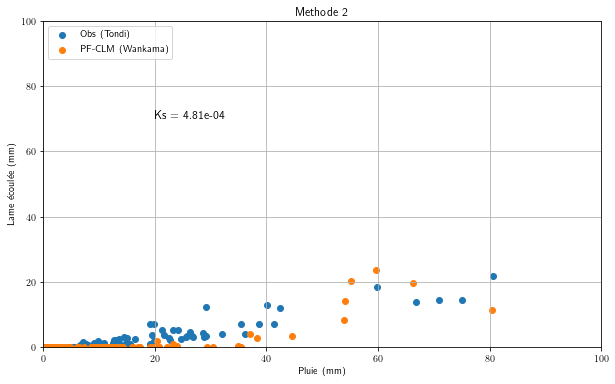

In [274]:
#a, b = np.polyfit(data_amenag['Pluie (mm)'],data_amenag['LR_avant'],1)
## Pluies annuelles Aghali

import pandas as pd
import matplotlib.pyplot as plt


# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.scatter(data_amenag['Pluie (mm)'], data_amenag['LR_avant'], marker='o',label='Obs (Tondi)')
plt.scatter(evts_bnz_06_08['Volume'],df_events_runoff['runoff'],marker='o',label='PF-CLM (Wankama)')
#plt.scatter(data_amenag['Pluie (mm)'], data_amenag['LR_après'], marker='o',label='Après')
plt.text(20, 70, f'Ks = {0.000481:.2e}', fontsize=12)
plt.xlabel('Pluie (mm)')
plt.ylabel('Lame écoulée (mm)')
plt.title('Methode 2')
plt.xlim([0,100])
plt.ylim([0,100])
plt.grid(True)
plt.legend(loc='upper left')
plt.show()


